# Generate Random Coordinates
___

This notebook will go through the generation of skypositions.
___

Implemented as `utils.generate_coordinates()`

In [6]:
from __future__ import print_function

try:
    from importlib import reload
except:
    pass

%matplotlib inline

from matplotlib import pyplot as plt

import os
import warnings

import numpy as np
import pandas as pd
import astropy as ap

from astropy import units as u
from astropy.coordinates import SkyCoord

In [82]:
# %%timeit # 100 loops, best of 3: 4.12 ms per loop
# nruns = 10000000
nruns = 100000

"""With help from CFro"""
low_ra = 0.
high_ra = 360.

low_dec = -90.
high_dec = -10

umin=np.radians(low_ra)/(2.*np.pi)
umax=np.radians(high_ra)/(2.*np.pi)

vmin=(np.cos(np.radians(90.+low_dec))+1.0)/2.
vmax=(np.cos(np.radians(90.+high_dec))+1.0)/2.

# pDec=np.random.uniform(vmin, vmax, size = nruns)
# pRa=np.random.uniform(umin, umax, size = nruns)
    
df = pd.DataFrame({"theta" : (2. * np.pi * (np.random.uniform(umin, umax, size = nruns) - 0.5)),
                  "phi" : (np.arccos(2. * np.random.uniform(vmin, vmax, size = nruns) - 1.) - np.pi/2.)})

100 loops, best of 3: 4.12 ms per loop


In [76]:
df

,phi,theta
0,-0.382534,0.163269
1,-0.236227,1.905200
2,-0.857141,2.498831
3,-0.199121,-1.699954
4,-0.441165,2.298782
5,-0.272541,2.507208
6,-0.321450,2.590073
7,-1.285581,2.601163
8,-0.487499,1.208624
9,-0.488286,-1.535922


In [77]:
# plt.hist(pRa)
# plt.hist(pDec)

In [78]:

# %%timeit 
# df["coords"] = SkyCoord(df["theta"], df["phi"], unit = u.radian )

In [79]:
hist, xedges, yedges = np.histogram2d(df["theta"], df["phi"], bins = 100)
X, Y = np.meshgrid(xedges, yedges)

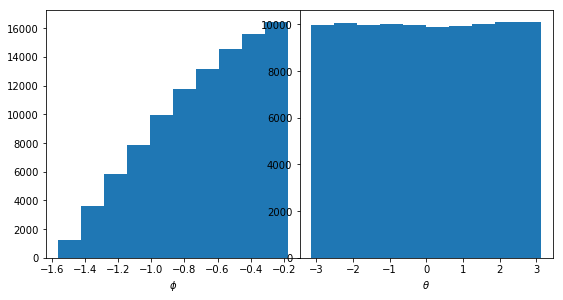

In [80]:
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.97, hspace=0, wspace = 0)
# ax = fig.add_subplot(111, projection="aitoff")
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

hist_phi = ax1.hist(df["phi"])
hist_theta = ax2.hist(df["theta"])

ax1.set_xlabel(r"$\phi$")
ax2.set_xlabel(r"$\theta$")

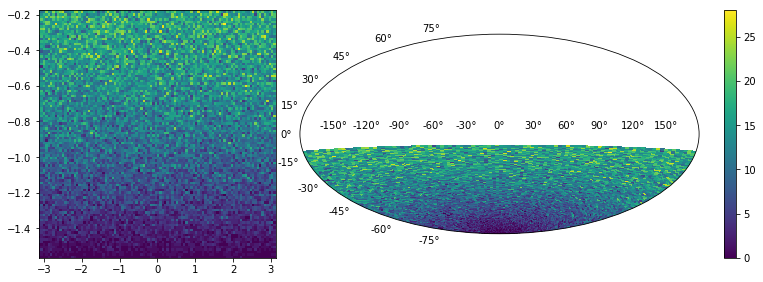

In [81]:
fig = plt.figure(figsize=[12, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.97, hspace=0, wspace = .1)

    
ax_flat = plt.subplot2grid((1,3), (0,0), colspan = 1, rowspan = 1)
ax_aitoff = plt.subplot2grid((1,3), (0,1), colspan = 2, rowspan = 1, projection="aitoff")

im_flat = ax_flat.pcolormesh(X, Y, hist.T)
im_aitoff = ax_aitoff.pcolormesh(X, Y, hist.T)


fig.colorbar(im_aitoff, ax=ax_aitoff)